<p>
<font size='5' face='Georgia, Arial'>IIC-2233 Apunte Programación Avanzada</font><br>
<font size='1'>&copy; 2015 Karim Pichara - Christian Pieringer. Todos los derechos reservados.</font>
</p>

# Programación Funcional

En este capítulo explicaremos los conceptos básicos de programación funcional y cómo este estilo de programación se lleva a cabo en Python.

De acuerdo al lenguaje de programación que estemos utilizando, podemos enfrentar un problema usando las siguientes estrategias:

- **Procedimental**: la solución se estructura como un programa lineal o una lista de instrucciones que dicen al computador qué se debe hacer con la entrada del programa.

- **Declarativa**: el usuario escribe la especificación del problema a ser resuelto y el lenguaje determina la mejor forma de ejecutar los cálculos eficientemente. Un ejemplo son las consultas en SQL, donde el usuario describe que datos quiere recibir y el motor SQL decide cómo revisar las tablas y que acciones debe ejecutar primero para obtener los datos de forma eficiente.

- **Orientada a Objetos**: los programas estarán orientados a modelar las funcionalidades a través de la interacción entre objetos por medio de sus datos y comportamientos que consultan o modifican sus datos.

- **Programación Funcional**: la solución del problema se estructura como un conjunto de funciones. Estas funciones deben tomar entradas y generan salidas. Las funciones no tienen datos propios o estados internos que modifican la salida de la función.

Python es un lenguaje multiparadigma, es decir, las soluciones pueden ser escritas de forma procedimental, orientada a objetos o funcional. Así, nuestros programas podrían ser escritos usando los diferentes enfoques de forma simultánea.

En programación funcional, el valor de retorno de una función depende solamente de los parámetros que la función recibe. Si trabajamos con un paradigma estrictamente funcional, la función debe poder leer los elementos recibidos como parámetros para construir un valor de retorno, sin embargo, no debe poder modificar estos elementos.

<h1>Funciones en Python</h1>

Existen muchas funciones que vienen implementadas en Python, principalmente con el propósito de simplificar y 
abstraer cálculos que pueden aplicar a objetos de clases distintas (_duck typing_). Pueden revisar todas ellas en la [documentación de funciones](https://docs.python.org/3/library/functions.html#sorted) de Python. Veamos algunos ejemplos:


## `len`

Retorna el número de elementos en algún tipo de contenedor (lista, diccionario, _set_, etc)

In [1]:
print(len([3,4,1,5,5,2]))
print(len({'nombre': 'Juan', 'apellido': 'Martinez'}))
print(len((4,6,2,5,6)))

6
2
5


Esta función viene implementada como un método interno  `__len__` en la mayoría de las clases de Python:

In [2]:
print([3,4,1,5,5,2].__len__())
print({'nombre': 'Juan', 'apellido': 'Martinez'}.__len__())

6
2


La función `len()` aplicada a un objeto en particular `MyObject` hace efectivamente un llamado a la función `MyObject.__len__()`.

Podemos también hacer _overriding_ del método `__len__`. Supongamos que queremos implementar un tipo especial de lista cuyo método
`__len__` retorna el largo de la lista sin considerar los elementos que se repiten:

In [3]:
from collections import defaultdict

class MyList(list):
    def __len__(self):
        
        # Cada vez que se llame con un key que no existe, se genera como default el valor 0, 
        # que sale de llamar a "int" sin argumentos (probar tipeando int() en la consola de Python).
        
        d = defaultdict(int)
        for i in range(list.__len__(self)):  # aquí llamamos a la función len de la clase list
            d.update({self[i] : d[self[i]] + 1})
        
        # aquí se llama al método len de d, que es un defaultdict
        return len(d)  
    
L = MyList([1,2,3,4,5,6,6,7,7,7,7,2,2,3,3,1,1])
print(len(L))


# Otra forma de hacer lo mismo
class MyList2(list):
    
    def __len__(self):
        #cada vez que se llame con un key que no existe, se genera como default el valor 0, 
        # que sale de llamar a "int" sin argumentos (probar tipeando int() en la consola de Python).
        d = defaultdict(int)
        for i in self:  # aquí llamamos a la función len de la clase list
            d.update({i : d[i] + 1})
        return len(d)  # aquí se llama al método len de d, que es un defaultdict
    
L = MyList2([1,2,3,4,5,6,6,7,7,7,7,2,2,3,3,1,1])
print(len(L))


# Otra forma de hacer lo mismo
class MyList3(list):
    
    def __len__(self):
        d = set(self)
        return len(d)  # aquí se llama al método len de d, que es un defaultdict
    
L = MyList3([1,2,3,4,5,6,6,7,7,7,7,2,2,3,3,1,1])
print(len(L))


7
7
7


## `__getitem__`

Al definir esta función dentro de una clase, cada instancia de la clase pasa a ser un iterable.

In [4]:
class MiClase:
    
    def __init__(self, palabra=None):
        self.palabra = palabra
        
    def __getitem__(self, i):
         return self.palabra[i]

p = MiClase("hola_mundo")
print(p[0])

[print(c) for c in p]

(a,b,c,d) = p[0:4]
print(a,b,c,d)
print(list(p))
print(tuple(p))

h
h
o
l
a
_
m
u
n
d
o
h o l a
['h', 'o', 'l', 'a', '_', 'm', 'u', 'n', 'd', 'o']
('h', 'o', 'l', 'a', '_', 'm', 'u', 'n', 'd', 'o')


## Reversed

La función `reversed()` toma una sequencia cualquiera como input y retorna una copia de la secuencia en orden inverso. 
También podemos personalizar la función haciendo un _overriding_ de `__reversed__` en cada clase. Si no personalizamos
el método `__reversed__`, simplemente se usará el _built-in_, que iterará usando `__getitem__` y `__len__` (itera `__len__` veces sobre el objeto usando `__getitem__`, hacia atrás)


Por ejemplo, podemos definir un tipo especial de lista que hace _override_ de `__reversed__`. En este caso, intercambia la primera mitad con la segunda, en vez de invertir el orden de los elementos.

In [5]:
lista = [1,2,3,4,5,6]


class MiReversa(list):
    
    def __init__(self, *args):
        super().__init__(args)
        
    def __reversed__(self):
        middle = self.__len__() // 2
        return self[middle:] + self[:middle]
    

for seq in lista, MiReversa(*lista):
    print("\n{} : ".format(seq.__class__.__name__), end = "")
    for item in reversed(seq):
        print(item, end = ", ")
    


list : 6, 5, 4, 3, 2, 1, 
MiReversa : 4, 5, 6, 1, 2, 3, 

## `enumerate`

`enumerate()` crea una lista de tuplas donde el primer objeto en cada tupla es el indice y el segundo es el item original:

Por ejemplo, si queremos iterar sobre una lista, y necesitamos obtener tanto el índice como su valor, una forma poco _pythonic_ de hacer esto sería la siguiente:

In [6]:
lista = ["a","b","c","d"]

for index in range(len(lista)):
    element = lista[index]
    print("{}: {}".format(index,element))

0: a
1: b
2: c
3: d


La función `enumerate` nos permite hacer exactamente mismo, pero de una forma más elegante y _pythonic_:

In [7]:
for index, element in enumerate(lista):
    print("{}: {}".format(index, element))

0: a
1: b
2: c
3: d


## `zip`

Toma dos o más secuencias o iterables y genera una lista de tuplas, donde el elemento i-ésimo contiene la tupla formada de los elementos i-ésimos de cada una de las secuencias o iterables. El largo de la lista retornada es igual al menor de los largos de las secuencias o iterables.

In [8]:
variables = ['nombre', 'apellido', 'email']
p1 = ["Juan", 'Perez', 'jp1@hotmail.com']
p2 = ["Gonzalo", 'Aldunate', 'gan@gmail.com']
p3 = ["Alberto", 'Gomez', 'agomez@yahoo.com']

contactos = []
for p in p1, p2, p3:
    contacto = zip(variables, p)
    contactos.append(dict(contacto))

for c in contactos:
    #  El doble asterisco es para pasar el diccionario c como "keyworded" argumentos
    # es equivalente a .format(nombre = c["nombre"], apellido = c["apellido"], email = c["email"]
    print("Nombre: {nombre} {apellido}, email: {email}".format(**c))
    
    
print(list(zip(variables, p1, p2, p3)))

Nombre: Juan Perez, email: jp1@hotmail.com
Nombre: Gonzalo Aldunate, email: gan@gmail.com
Nombre: Alberto Gomez, email: agomez@yahoo.com
[('nombre', 'Juan', 'Gonzalo', 'Alberto'), ('apellido', 'Perez', 'Aldunate', 'Gomez'), ('email', 'jp1@hotmail.com', 'gan@gmail.com', 'agomez@yahoo.com')]


### La función `zip()` también es la inversa de sí misma

In [9]:
A = [1, 2, 3, 4]
B = ['a', 'b', 'c', 'd']

zipped = zip(A, B)
zipped = list(zipped)
print(zipped)

unzipped = zip(*zipped)
unzipped = list(unzipped)
print(unzipped)


[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]
[(1, 2, 3, 4), ('a', 'b', 'c', 'd')]


# Listas por Comprensión

Desde el punto de vista de la lógica, la definición de comprensión es:  "Conjunto de caracteres que forman un concepto". Así mismo, las listas por comprensión se pueden ver como listas formadas por un conjunto de objetos que cumplen con un concepto en particular.

Por ejemplo, tenemos una lista de números guardados como `strings`y queremos construir una lista con los mismos números, pero guardados como `ints`. Una forma de hacerlo sería lo siguiente:

In [10]:
lista = ['1', '4', '55', '65','4', '15', '90']

int_lista = []

for c in lista:
    int_lista.append(int(c))
    
print(int_lista)

[1, 4, 55, 65, 4, 15, 90]


Usando listas por comprensión, podemos hacer lo mismo de forma más clara y concisa:

In [11]:
lista = ['1', '4', '55', '65','4', '15', '90']
int_lista = [int(c) for c in lista]
print(int_lista)

[1, 4, 55, 65, 4, 15, 90]


La sentencia `if` se puede usar dentro de una lista por comprensión para construir la lista incluyendo solamente los elementos que cumplan una cierta condición.

Por ejemplo, a continuación convertiremos a `int` e incluiremos en la nueva lista solamente los números que estén representados en un `string` con largo estrictamente mayor a uno.

In [12]:
int_lista_2d = [int(c) for c in lista if len(c) > 1]
print(int_lista_2d)

[55, 65, 15, 90]


<h1>Sets y Diccionarios por comprensión</h1>

  La misma idea la podemos aplicar a otras estructuras de datos, como sets y diccionarios:

In [13]:
from collections import namedtuple
# namedtuple es una subclase de tuplas que tiene campos (con nombres arbitrarios), 
# pueden ser accesados como tupla.campo
Pelicula = namedtuple("Pelicula", ["titulo", "director", "genero"])
peliculas = [Pelicula("Into the Woods", "Rob Marshall", "Adventure"),
           Pelicula("American Sniper", "Clint Eastwood", "Action"),
           Pelicula("Birdman", "Alejandro González Inárritu", "Comedy"),
           Pelicula("Boyhood", "Richard Linklater", "Drama"), 
           Pelicula("Taken 3", "Olivier Megaton", "Action"), 
           Pelicula("The Imitation Game", "Morten Tyldum", "Biography"),
           Pelicula("Gone Girl", "David Fincher", "Drama")]

directores_accion = {b.director for b in peliculas if b.genero == 'Action'}  # set comprehension
print(directores_accion)


{'Olivier Megaton', 'Clint Eastwood'}


<h3> Podemos crear diccionarios con los resultados de búsqueda:</h3>

In [14]:
dict_directores_accion = {b.director: b for b in peliculas if b.genero == 'Action'}
print(dict_directores_accion)

{'Clint Eastwood': Pelicula(titulo='American Sniper', director='Clint Eastwood', genero='Action'), 'Olivier Megaton': Pelicula(titulo='Taken 3', director='Olivier Megaton', genero='Action')}


In [15]:
dict_directores_accion['Olivier Megaton']

Pelicula(titulo='Taken 3', director='Olivier Megaton', genero='Action')

## Generadores

Los generadores son un caso especial de los **iteradores** (en el material de la semana pasada). Los generadores nos permiten iterar sobre secuencias de datos sin la necesidad de almacenarlos en alguna estructura de datos, evitando el uso innecesario de memoria. 

Una vez que terminamos de iterar sobre un generador, el generador desaparece. Esto es muy útil cuando queremos realizar cálculos sobre secuencias de números que sólo nos sirven para ese cálculo en particular. La sintaxis para crear generadores es muy parecida a la comprensión de listas, sólo que en vez de paréntesis cuadrados [] usamos paréntesis normales ():

In [16]:
from sys import getsizeof

In [17]:
generador_pares = (2*i for i in range(10))
#por el sólo hecho de usar paréntesis 
#significa que estamos creando un generador
print('tamaño del generador:', getsizeof(generador_pares))

lista_pares = [2*i for i in range(10)]#c usa más memoria que a

print('tamaño de la lista:', getsizeof(lista_pares))

tamaño del generador: 88
tamaño de la lista: 192


A continuación podemos observar que una vez que ya hemos iterado sobre el generador, no lo podemos volver a utilizar.

In [18]:
print('valores del generador')
for i in generador_pares:
    print(i)

print('valores del generador')
for i in generador_pares:
    print(i)
#como ya terminamos de iterar sobre a
#la secuencia desaparece

valores del generador
0
2
4
6
8
10
12
14
16
18
valores del generador


## Funciones Generadoras

Las funciones en Python también tienen la posibilidad de funcionar como generadores, a través de `yield`. El statement `yield` reemplaza a `return`, por un lado se encarga de retornar el valor pero además nos asegura que en la próxima llamada a la función, ésta será ejecutada partiendo desde el punto donde quedó en la ejecución anterior. En otras palabras, trabajamos con una función que una vez que "retorna" un valor a través de `yield`, está transfierendo el control sólo en forma temporal, asumiendo que pronto será utilizada nuevamente para "generar" más valores. Al llamar a una función generadora se crea un objeto generador, sin embargo, esto no comienza a ejecutar la función. Ejemplo:

In [19]:
def conteo_dec(n):
    print("Contando en forma decreciente desde {}".format(n))
    while n > 0:
        yield n
        n -= 1

La función se ejecuta una vez que llamamos a `next` del objeto generado por la función, que retorna un generador.

In [20]:
x = conteo_dec(10)#notar que aquí no se imprime nada
print("{}\n".format(x))#aquí sólo se imprime el objeto
y = conteo_dec(5)
print(next(y))
print(next(y))
print(next(y))
print(next(y))
#for i in conteo_dec(5):
#    print(i)

<generator object conteo_dec at 0x7fe7505d4308>

Contando en forma decreciente desde 5
5
4
3
2


In [21]:
def fibonacci():
    a,b = 0,1
    while True:
        yield b
        a, b = b, a + b

f = fibonacci()
print(next(f))
print(next(f))
print(next(f))
print(next(f))
print(next(f))
print(next(f))
g1 = [next(f) for i in range(10)]
print(g1)
g2 = (next(f) for i in range(10))
for a in g2: print(a)

1
1
2
3
5
8
[13, 21, 34, 55, 89, 144, 233, 377, 610, 987]
1597
2584
4181
6765
10946
17711
28657
46368
75025
121393


In [1]:
import numpy as np
def maximo(values):
    temp_maxim = -np.infty
    for v in values:
        if v > temp_maxim:
            temp_maxim = v
        yield temp_maxim
        
elements = [10, 14, 7, 9, 12, 19, 33]
res = maximo(elements)
print(next(res))
print(next(res))
print(next(res))
print(next(res))
print(next(res))
print(next(res))
print(next(res))#aquí se acabó la lista

ImportError: 
Importing the multiarray numpy extension module failed.  Most
likely you are trying to import a failed build of numpy.
If you're working with a numpy git repo, try `git clean -xdf` (removes all
files not under version control).  Otherwise reinstall numpy.

Original error was: DLL load failed: No se encontró el proceso especificado.


### También podemos interactuar con la función enviando mensajes 

El método `send()` permite enviar un valor hacia el generador, lo que significa que la expresión `yield` lo recibirá. El valor enviado puede ser usado para asignarlo a otra variable, por ejemplo: `v = yield self.value`

In [2]:
def mov_avg():
    print("entrando...")
    total = float((yield))
    cont = 1
    print("total = {}".format(total))
    while True:
        print("loop del while...")
        i = yield total / cont #aquí el i recibe el mensaje, además se está retornando total/count
        cont += 1
        total += i
        print("i = {}".format(i))
        print("total = {}".format(total))
        print("cont = {}".format(cont))

Notar que el código debe ejecutar al menos hasta el primer `yield` para poder empezar a aceptar valores desde `send()`. Así siempre es necesario llamar a `next()` (o `send(None)`) una vez después de haber creado el generador para poder comenzar a enviarle datos.

In [24]:
m = mov_avg()
print("entrando al primer next")
next(m)#avanzamos al primer yield
print("saliendo del primer next")
m.send(10)
print("entrando al send de 5")
m.send(5)
print("entrando al send de 0")
m.send(0)
print("entrando al otro send de 0")
m.send(0)
print("entrando al send de 20")
m.send(20)

entrando al primer next
entrando...
saliendo del primer next
total = 10.0
loop del while...
entrando al send de 5
i = 5
total = 15.0
cont = 2
loop del while...
entrando al send de 0
i = 0
total = 15.0
cont = 3
loop del while...
entrando al otro send de 0
i = 0
total = 15.0
cont = 4
loop del while...
entrando al send de 20
i = 20
total = 35.0
cont = 5
loop del while...


7.0

In [25]:
m = mov_avg()
print(next(m))
print(m.send(10))
print(m.send(5))
print(m.send(0))
print(m.send(0))
print(m.send(20))

entrando...
None
total = 10.0
loop del while...
10.0
i = 5
total = 15.0
cont = 2
loop del while...
7.5
i = 0
total = 15.0
cont = 3
loop del while...
5.0
i = 0
total = 15.0
cont = 4
loop del while...
3.75
i = 20
total = 35.0
cont = 5
loop del while...
7.0


## Lambda Functions

Las funciones `lambda` son una forma alternativa de definir funciones en Python.
Además de su nombre griego, no hay nada intimidante en ellas.
Veamos un ejemplo.

In [26]:
sumar_uno = lambda x: x+1

#es (casi) equivalente a

def sumar_uno(x):
    return x+1

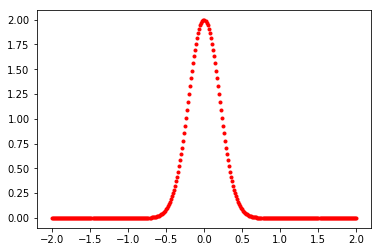

In [27]:
#para que el gráfico se genere dentro del notebook y no en una ventana aparte
%matplotlib inline 

import numpy as np
from matplotlib import pyplot as plt

gauss = lambda x, mu, sigma: (1./(np.sqrt(2*np.pi)*sigma)) * np.exp(-0.5*((x - mu)/sigma)**2)

mu = 0.
sigma = 0.2
x = np.linspace(-2,2,300)
plt.plot(x, gauss(x, mu, sigma), '.r')
plt.show()



Sin embargo, las funciones `lambda` pueden, **además**, ser definidas de forma anónima; es decir, funciones que no tienen nombre.
Estas funciones pueden ser vistas como _fugaces_ y son utilizadas únicamente donde fueron creadas.
Esta anonimidad se combina bien con las funciones que veremos a continuación: `map`, `filter`, `reduce`.

## `map`

`map` recibe como parámetros una función y al menos un iterable. Retorna un generador que resulta de aplicar de la función sobre el iterable. `map(f, iterable)` es equivalente a `(f(x) for x in iterable)`

La cantidad de iterables entregada a `map` debe corresponder con la cantidad de parámetros que recible la función `f`. Por ejemplo, 
`map(f, iterable1, iterable2)` es equivalente a `(f(x) for x in zip(iterable1, iterable2))`

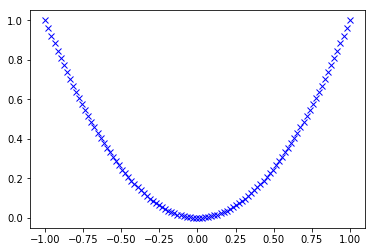

In [28]:
pow2 = lambda x : x**2
t = np.linspace(-1.,1., 100)#crea un arreglo numpy de 100 elementos, partiendo desde -1 y llegando a 1
plt.plot(t, list(map(pow2, t)), 'xb')
plt.show()

Map puede ser aplicado también en más de una lista:

In [29]:
a = [1, 2, 3, 4]
b = [17, 12, 11, 10]
c = [-1, -4, 5, 9]

c1 = list(map(lambda x, y: x + y, a, b))

c2 = list(map(lambda x, y, z: x + y + z, a, b, c))

c3 = list(map(lambda x, y, z: 2.5*x + 2*y - z, a, b, c))

print(c1)
print(c2)
print(c3)


[18, 14, 14, 14]
[17, 10, 19, 23]
[37.5, 33.0, 24.5, 21.0]


## `filter`   

`filter(f, secuencia)` retorna el resultado de aplicar la función `f` a `secuencia`, dejando fuera los datos en que el resultado de aplicar `f` al elemento fue `False`. La función `f` **debe** retornar un valor de tipo booleano.

In [30]:
f = fibonacci() #función definida más arriba
fib = [next(f) for i in range(11)]
impares = list(filter(lambda x: x % 2 != 0, fib))
print(impares)

pares = list(filter(lambda x: x % 2 == 0, fib))
print(pares)



[1, 1, 3, 5, 13, 21, 55, 89]
[2, 8, 34]


## `reduce`

`reduce(f, [s1,s2,s3,...,sn])` retorna lo que resulta de aplicar la función `f` a la secuencia `[s1, s2, s3, ..., sn]` de la siguiente forma: `f(f(f(f(s1,s2),s3),s4),s5),...`  ![](files/1.reduce.png)



In [31]:
from functools import reduce
reduce(lambda x, y: x+y, range(1,10))

45